In [1]:
DRAW = False

## Dev parameters

In [2]:
import sys
sys.path.insert(1, '../')

# get trainer.
from src.Trainer import Trainer

2023-08-13 15:00:32.136199: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 15:00:32.208665: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 15:00:32.209801: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 15:00:33.189544: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# IMPORTS

In [3]:
# data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# confere data.
import sklearn.metrics
import cv2
import natsort

# logger.
import pickle
import mlflow

# DATASETs

In [4]:
# separate datasets.
trainer = Trainer()
[train_set, val_set] = trainer.train_val_split(augment=True)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


# FP MODEL

## Train

In [5]:
trainer.build_fp_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 2)       20        
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 2)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 4)         76        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 4)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         296       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 8)         0

In [6]:
trainer.training_loop()

2023/08/13 15:00:35 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/08/13 15:00:35 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/40
56/56 - 6s - loss: 0.7141 - recall: 0.7164 - binary_accuracy: 0.6166 - precision: 0.6690 - false_negatives: 152.0000 - false_positives: 190.0000 - val_loss: 0.5805 - val_recall: 0.8507 - val_binary_accuracy: 0.7117 - val_precision: 0.7215 - val_false_negatives: 20.0000 - val_false_positives: 44.0000 - 6s/epoch - 114ms/step
Epoch 2/40


/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/56 - 4s - loss: 0.5628 - recall: 0.7910 - binary_accuracy: 0.7063 - precision: 0.7387 - false_negatives: 112.0000 - false_positives: 150.0000 - val_loss: 0.5394 - val_recall: 0.7985 - val_binary_accuracy: 0.7252 - val_precision: 0.7589 - val_false_negatives: 27.0000 - val_false_positives: 34.0000 - 4s/epoch - 70ms/step
Epoch 3/40
56/56 - 5s - loss: 0.5284 - recall: 0.8022 - binary_accuracy: 0.7231 - precision: 0.7531 - false_negatives: 106.0000 - false_positives: 141.0000 - val_loss: 0.5290 - val_recall: 0.7612 - val_binary_accuracy: 0.7252 - val_precision: 0.7786 - val_false_negatives: 32.0000 - val_false_positives: 29.0000 - 5s/epoch - 85ms/step
Epoch 4/40
56/56 - 3s - loss: 0.5039 - recall: 0.7929 - binary_accuracy: 0.7388 - precision: 0.7770 - false_negatives: 111.0000 - false_positives: 122.0000 - val_loss: 0.5100 - val_recall: 0.7836 - val_binary_accuracy: 0.7162 - val_precision: 0.7554 - val_false_negatives: 29.0000 - val_false_positives: 34.0000 - 3s/epoch - 61ms/step
Epoch 

2023/08/13 15:03:50 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/08/13 15:03:50 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmpc5viw8as/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpc5viw8as/model/data/model/assets


In [7]:
trainer.load_model_trained()

## Results evaluation

In [8]:
# turn off data augmentation to reproducible results.
[train_set, val_set] = trainer.train_val_split(augment=False)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


56/56 [==============================] - 2s 35ms/step
fp_Train_Metrics
 {'fp_Train_recall': 0.9514925373134329, 'fp_Train_acc': 0.9484304932735426, 'fp_Train_precision': 0.9622641509433962}
Confusion matrix Train 
 [[336  20]
 [ 26 510]]
56/56 [==============================] - 2s 40ms/step
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (180).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (181).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (193).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (205).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (237).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (258).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (3).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (342).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (346).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (349).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (379).jpe

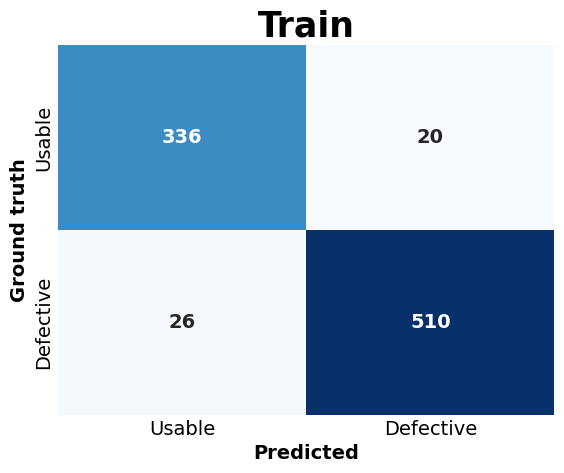

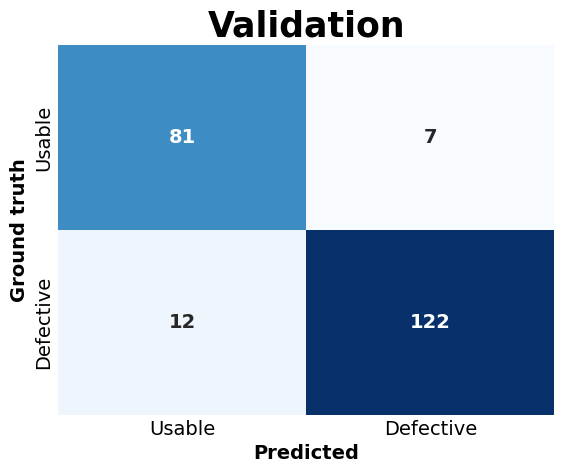

In [9]:
# get confusion matrix and wrong inferences.
trainer.init_metrics_handler()
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "fp")
    trainer.get_errors(set, name, "fp", draw_errors=DRAW)

# QT MODEL

## Build

In [10]:
# build qt model.
trainer.build_qt_model()

INFO:tensorflow:Assets written to: /tmp/tmpl622zi7k/assets


INFO:tensorflow:Assets written to: /tmp/tmpl622zi7k/assets
/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2023-08-13 15:04:08.663569: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-13 15:04:08.663602: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-13 15:04:08.663959: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpl622zi7k
2023-08-13 15:04:08.666553: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-13 15:04:08.666585: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpl622zi7k
2023-08-13 15:04:08.673894: I tensorflow/compi

QT model detais:
input details = {'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 128, 128,   1], dtype=int32), 'shape_signature': array([ -1, 128, 128,   1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (1.0, -128), 'quantization_parameters': {'scales': array([1.], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
output details = {'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.00390625, -128), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


b' \x00\x00\x00TFL3\x00\x00\x00\x00\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x88\x00\x00\x00\xe0\x00\x00\x00\x90\x0f\x00\x00\xa0\x0f\x00\x00d%\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\xae\xef\xff\xff\x0c\x00\x00\x00\x1c\x00\x00\x008\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\x94\xff\xff\xff\x19\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00dense\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\xf6\xf0\xff\xff\x04\x00\x00\x00\x0c\x00\x00\x00conv2d_input\x00\x00\x00\x00\x02\x00\x00\x004\x00\x00\x00\x04\x00\x00\x00\xdc\xff\xff\xff\x1c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\x1b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x1d\x00\x00\x00\xac\x0e\x00\x00\xa4\x0e\x00\x00\x8c\x0e\x00\x00p\x0e\x00\x00`\n\x00\x00\x10\n\x00\x00\x80\x05\x00\x00P\x05\x00\x00\x00\x03\x00\x00\xd0\x02\x00\x00\xa

## Compare QT and FP models

In [11]:
trainer.quantization_error(train_set)

56/56 [==============================] - 2s 35ms/step


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


qt_Metrics
 {'qt_mean': -0.005239345, 'qt_std': 0.017680971, 'qt_abs_mean': 0.009437336, 'qt_abs_std': 0.01584311}


{'diff': array([-2.93450654e-02,  9.58597660e-03, -1.45466924e-02,  8.26028585e-02,
        -1.28629506e-02, -3.23300064e-03, -1.25041511e-03, -2.05850601e-03,
        -3.57817486e-03, -2.25729216e-03, -3.30669247e-03,  2.07890803e-03,
         7.56449439e-03, -4.64410335e-02, -2.10897624e-03, -6.95530325e-04,
         2.66948342e-02, -1.48332268e-02, -1.35971531e-02, -2.91173859e-03,
        -1.11060478e-02, -2.34073121e-03, -2.24713087e-02, -5.50776534e-03,
        -9.74977855e-04, -1.01604126e-02, -6.46670535e-03, -2.94502974e-02,
         1.15337968e-02, -2.88968161e-03,  8.83930922e-03, -2.98256874e-02,
        -6.34996220e-04,  2.78657153e-02, -3.07368040e-02,  2.43619084e-02,
        -1.28972437e-03, -1.29209831e-03, -3.04283760e-03, -8.14694911e-04,
         1.99239329e-03, -8.38907808e-03,  7.59091228e-03,  3.48132849e-03,
         2.74997950e-03, -4.18282114e-03, -6.84574421e-04, -5.38304448e-04,
        -1.58057883e-02, -1.81177408e-02, -4.92925290e-04, -4.49551046e-02,
    

## Evaluate results

qt_Train_Metrics
 {'qt_Train_recall': 0.9533582089552238, 'qt_Train_acc': 0.9495515695067265, 'qt_Train_precision': 0.9623352165725048}
Confusion matrix Train 
 [[336  20]
 [ 25 511]]
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (180).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (181).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (193).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (205).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (237).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (258).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (3).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (309).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (342).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (346).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (349).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (379).jpeg', '../dataset/resize_128/train/0_utilizavel

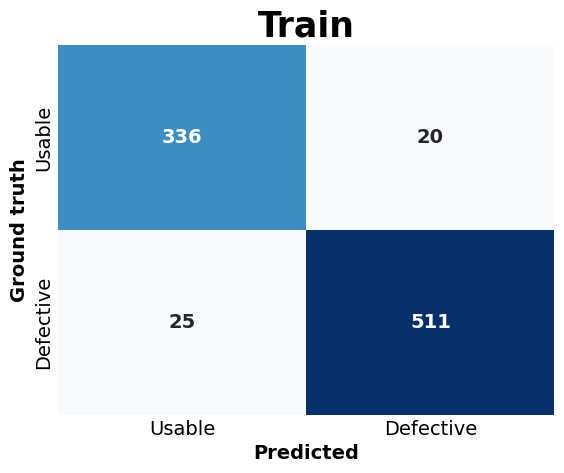

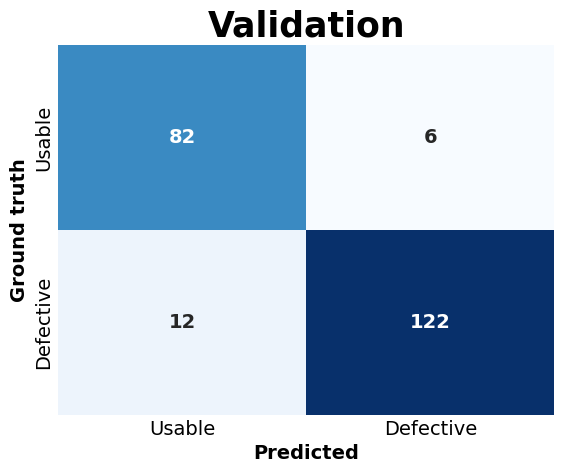

In [12]:
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "qt")
    trainer.get_errors(set, name, "qt", draw_errors=DRAW)

# TEST DATASET

In [13]:
# test results.
test_set = trainer.test_set_gen()

Found 183 images belonging to 2 classes.
Test set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


## FP model

12/12 [==============================] - 0s 36ms/step
fp_Test_Metrics
 {'fp_Test_recall': 0.9272727272727272, 'fp_Test_acc': 0.912568306010929, 'fp_Test_precision': 0.9272727272727272}
Confusion matrix Test 
 [[ 65   8]
 [  8 102]]
12/12 [==============================] - 0s 36ms/step
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (446).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (461).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (463).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (480).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (487).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (498).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (516).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (677).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (680).jpeg', '../dataset/

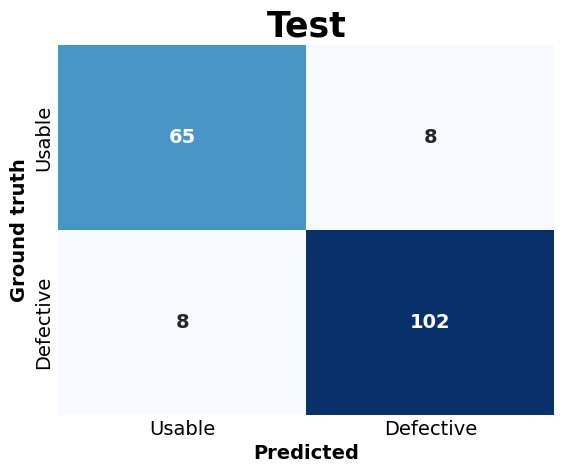

In [14]:
trainer.get_confusion_matrix(test_set, "Test", "fp")
trainer.get_errors(test_set, "Test", "fp", draw_errors=True)

## QT model

qt_Test_Metrics
 {'qt_Test_recall': 0.9272727272727272, 'qt_Test_acc': 0.9180327868852459, 'qt_Test_precision': 0.9357798165137615}
Confusion matrix Test 
 [[ 66   7]
 [  8 102]]
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (446).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (461).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (463).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (480).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (488).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (498).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (677).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (680).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (687).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (690).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (741).jp

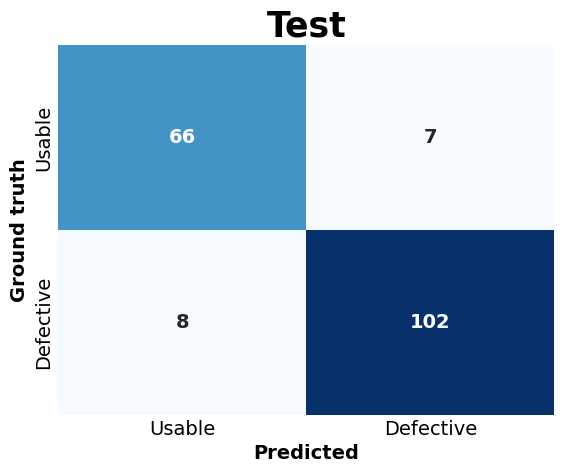

In [15]:
trainer.get_confusion_matrix(test_set, "Test", "qt")
trainer.get_errors(test_set, "Test", "qt", draw_errors=True)

# END LOGGER RUN

In [16]:
trainer.end_run()